# Intro Python Machine Learning

## Biblliotecas

| Modulo | Descrição |
|--------|-----------|
| numpy  | Numpy é um acrônimo para Numerical Python, módulo fundamental para análise de dados e computação científica. Principais funções a serem utilizadas: min, max, mean, median, mode, quantile. |
| pandas | Pandas é um acrônimo para Python Data Analysis Library. É um pacote poderoso e flexível para utilização em análise de dados. O Pandas será bastante utilizado para o tratamento dos dataframes. |
| sympy  | Sympy é uma biblioteca voltada a matemática simbólica no Python. Esta ferramenta é utilizada para estudos de limites, derivadas e integrais. Algumas funções: limit, diff e integrate. |
| scipy  | Ferramenta proposta para auxiliar nos problemas gerais de cálculo, probabilidade e testes de hipóteses. Principais funções que utilizaremos: binom, poisson, expon, norm, t, chi2, f. |
| statsmodels | O statsmodels é um módulo voltado para aplicação de vários modelos estatísticos. A principal função que utilizaremos será a OLS. |
| sklearn | O scikit-learn é uma ferramenta voltada para análise preditiva. Utilizaremos este módulo para aplicar as funções LinearRegression, PCA e Kmeans. |


## Técnicas de análise


| Técnicas de análise | Objetivos |
|--------------------|-----------|
| Analise Descritiva | Entender o comportamento geral dos dados |
| Testes de hipóteses | Verificar uma afirmacão sobre os dados |
| Analise correlacao/associacao | Analises voltadas a verificar a relacao entre duas variaveis |
| Regressão linear | Ajustar o modelo para explicar alguma variável objetivo traçado pelo negócio |
| Analise de series temporais | Projetar o historico de vendas ou faturamento para o proximo período |
| Analise de componentes principais | Agrupar atributos de forma a reduzir a dimensao necessaria para ser explicada |
| Analise de conglomerados (cluster) | Agrupar individuos conforme atributos selecionados |




## Exemplos:

## Ferramentas de análise descritiva e testes de hipóteses

### Ferramentas de estatistica descritiva 

In [38]:
import numpy as np
import pandas as pd
import sympy as super

# pd dataframe
df_countries_data = pd.read_csv('dados_1997_2011_paises.csv', sep=';', encoding='latin1', decimal=',')

# Descriptive statistics

df_countries_data.groupby('pais')\
    .agg(
        min_idh = pd.NamedAgg('idh', 'min'),
        max_idh = pd.NamedAgg('idh', 'max'),
        avg_idh = pd.NamedAgg('idh', 'mean'),
        median_idh = pd.NamedAgg('idh', 'median'),
        std_idh = pd.NamedAgg('idh', 'std'),
    )

,min_idh,max_idh,avg_idh,median_idh,std_idh
pais,,,,,
Alemanha,0.8466,0.9050,0.882880,0.8888,0.020187
Austrália,0.8958,0.9290,0.914507,0.9156,0.010485
Brasil,0.6464,0.7180,0.684653,0.6866,0.022727
Bélgica,0.8628,0.8860,0.876107,0.8754,0.006401
Canadá,0.8736,0.9080,0.890480,0.8894,0.011899
China,0.5598,0.6870,0.625240,0.6240,0.041928
Cingapura,0.7404,0.8660,0.821587,0.8282,0.037984
Coréia,0.8078,0.8970,0.856907,0.8588,0.029773
Espanha,0.8162,0.8780,0.852427,0.8534,0.019299


### Ferramentas de probabilidade

In [39]:
from scipy.stats import binom, poisson, norm

# binomial

n = 5
p = 0.8

binom.pmf(k =1, n = n, p = p)

# poisson
mu = 2
poisson.pmf(k = 1, mu = mu)

# normal

average = 30
std = 6

norm.pdf(x = 25, loc = average, scale = std)

np.float64(0.04698531256838376)

### Ferramentas de cálculo

In [40]:
import sympy as sp
# derivative
x = sp.Symbol('x')
f = x**2 

sp.diff(f)

2*x

### Ferramentas de amostragem

In [41]:
df_amostra = df_countries_data.sample(n=50)
df_amostra.shape

(50, 8)

### Ferramentas de testes e hipóteses

In [45]:
from scipy import stats as st

brazil_data = df_countries_data[df_countries_data['pais'] == 'Brasil']

st.ttest_1samp(a=brazil_data['idh'], popmean=0.5)   

TtestResult(statistic=np.float64(31.467547309127106), pvalue=np.float64(2.1573861411421064e-14), df=np.int64(14))

## Ferramentas de preparação de dados e Machine Learning

### Ferramentas de correlação e associação 

In [50]:
cols = ['idh', 'corrupcao_indice', 'competitividade_indice', 'globalizacao_indice']

df_countries_data[cols].corr()

,idh,corrupcao_indice,competitividade_indice,globalizacao_indice
idh,1.000000,0.742528,0.576736,0.807371
corrupcao_indice,0.742528,1.000000,0.753907,0.807345
competitividade_indice,0.576736,0.753907,1.000000,0.580710
globalizacao_indice,0.807371,0.807345,0.580710,1.000000


### Ferramentas de análise de regressão e séries temporais

Apesar do coeficiente de correlacao ser bastante informativo para analisar o relacionamento entre duas
variaveis, correlacão nao implica causalidade. Para os casos em que seja necessário analisar se uma va-
riável influencia/causa em alguma outra, podemos utilizar as ferramentas de análise de regressao e séries
temporais.

In [54]:
import statsmodels.formula.api as sm

regression_model = sm.ols(formula = 'idh ~ corrupcao_indice + competitividade_indice + globalizacao_indice', data=df_countries_data).fit()

regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    idh   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     197.3
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           7.53e-69
Time:                        17:30:58   Log-Likelihood:                 365.76
No. Observations:                 285   AIC:                            -723.5
Df Residuals:                     281   BIC:                            -708.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.3039      0.029     10.493      0.000       0.247       0.361
corrupcao_indice           0.0010      0.000      2.756      0.006       0.000       0.002
competitividade_indice     0.0006      0.000      1.516      0.131      -0.000       0.001
globalizacao_indice        0.0053      0.001     10.492      0.000       0.004       0.006
==============================================================================
Omnibus:                        0.422   Durbin-Watson:                   0.151
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.414
Skew:                           0.092   Prob(JB):                        0.813
Kurtosis:                       2.963   Cond. No.                         870.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ferramentas de análise multivariada de dados

As tecnicas que abordaremos neste topico fazem parte do grupo de "Tecnicas de Machine Learning Nao
Supervisionadas". A respeito destas tecnicas, abordaremos a analise de componentes principais e analise
de conglomerados (cluster).

In [63]:
from sklearn.cluster import KMeans

# estattiscas descritivas

data_summary = df_countries_data.groupby('pais')\
                                .agg(
                                    avg_corruption = pd.NamedAgg('corrupcao_indice', 'mean'),
                                    avg_competitiveness = pd.NamedAgg('competitividade_indice', 'mean'),
                                    avg_globalization = pd.NamedAgg('globalizacao_indice', 'mean'),
                                )\
                                .reset_index()

# instanciar algortimo
kmeans = KMeans( 
    init='random',
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

# aplicar o algoritmo nos dados
kmeans.fit(data_summary[['avg_corruption', 'avg_competitiveness', 'avg_globalization']])

# associar clusters aos países
data_summary['cluster'] = kmeans.labels_

# verificar resultados
data_summary.head()


,pais,avg_corruption,avg_competitiveness,avg_globalization,cluster
0,Alemanha,79.066667,74.262667,84.034138,0
1,Austrália,86.800000,80.448667,81.790126,0
2,Brasil,36.533333,49.568000,59.332414,2
3,Bélgica,67.200000,69.065333,92.173351,1
4,Canadá,88.466667,81.897333,87.087049,0


### Ferramentas de limpeza e normalização de dados

<Axes: >

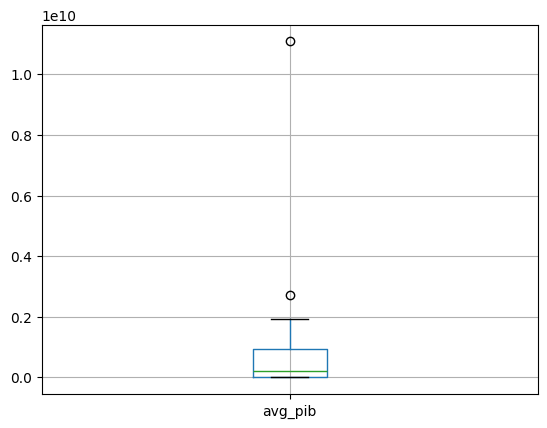

In [65]:
# estatistica descritiva
data_summary = df_countries_data.groupby('pais')\
                                .agg(avg_pib = pd.NamedAgg('pib', 'median'))\
                                .reset_index()

# boxplot
data_summary[['avg_pib']].boxplot()